# MXNet + Transfer Learning
With TransferLearning Applied

[https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images](https://www.kaggle.com/maysee/mushrooms-classification-common-genuss-images)


In [ ]:
!pip install mxnet

     |████████████████████████████████| 46.9 MB 50 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [1]:
# it might require to setup kaggle cli to download dataset

!mkdir ~/.kaggle && cp ./kaggle.json ~/.kaggle/

cp: ./kaggle.json: No such file or directory


In [ ]:
!pwd && cp ./kaggle.json ~/.kaggle/

/content


In [ ]:
! kaggle datasets download -d maysee/mushrooms-classification-common-genuss-images

 99% 1.84G/1.85G [00:17<00:00, 55.3MB/s]
100% 1.85G/1.85G [00:17<00:00, 114MB/s] 


In [ ]:
! unzip mushrooms-classification-common-genuss-images.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: mushrooms/Mushrooms/Boletus/0622_axDS6XbWq14.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0623_rGwoTDghdAY.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0624_RmlDHXvJUeU.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0625_zqKe97TlLiA.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0626_Vr79bfyR04Q.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0627_eN6cXmAY_WM.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0628_HgADwtCnaLg.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0629_vlmH59caIwg.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0630_dhxHhToh_80.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0631_PJXNFQZc7n8.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0632_Rc_3hYDbYqU.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0633_0hFXcQuG57k.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0634_T00gs2bFUuQ.jpg  
  inflating: mushrooms/Mushrooms/Boletus/0635_-J_6XTsYZMA.jpg  
  inflating: mushrooms/Mushrooms/Bol

In [ ]:
import mxnet as mx
from mxnet.gluon.data.vision import transforms

from mxnet import nd, gluon, autograd
from mxnet.gluon import nn
import pickle

import numpy as np
import matplotlib.pyplot as plt
import zipfile
from random import shuffle
# Select a fixed random seed for reproducibility
mx.random.seed(42)
import os

In [ ]:
# for transfer learning, will use pretrained models
import json
from mxnet.gluon.model_zoo import vision

In [ ]:
class_names = ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius', 'Entoloma', 'Hygrocybe',
'Lactarius', 'Russula', 'Suillus']

In [2]:
# lets investigate whats inside:

! ls /content/Mushrooms

ls: /content/Mushrooms: No such file or directory


In [ ]:
import os
import shutil

def split_train_test(source_dir='/content/Mushrooms', train_dir='./mushrooms-dataset/train/', test_dir='./mushrooms-dataset/test/'):
    for root, dirs, files in os.walk(source_dir):
        count = 0
        print(len(files))
        l = int(len(files)*0.2)
        for name in files:
            current_filepath = os.path.join(root, name)
            dataset_dir = train_dir if (l < count) else test_dir
            new_filepath = current_filepath.replace(source_dir, dataset_dir)
            try:
                os.makedirs(os.path.dirname(new_filepath))
            except FileExistsError:
                pass
            shutil.move(current_filepath, new_filepath)
            count += 1
    #shutil.rmtree(source_dir)




In [ ]:
split_train_test()

0
1073
1563
750
1148
364
316
353
836
311


In [ ]:
train_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset('/content/mushrooms-dataset/train/')
test_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset('/content/mushrooms-dataset/test/')

In [ ]:
print(len(train_dataset), len(test_dataset))

5366 1348


Data type: <class 'numpy.uint8'>
Label: 1
Label description: Amanita
(600, 800, 3)


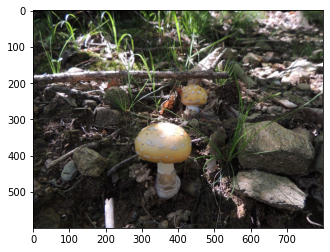

In [ ]:
sample_idx = 555
sample = train_dataset[sample_idx]
data = sample[0]
label = sample[1]

plt.imshow(data.asnumpy(), cmap='gray')
print("Data type: {}".format(data.dtype))
print("Label: {}".format(label))
print("Label description: {}".format(train_dataset.synsets[label]))
print(data.shape)

In [ ]:
transformer = transforms.Compose([
  transforms.CenterCrop(550),
  transforms.Resize(224, keep_ratio=True),
  transforms.ToTensor()])


train_data = train_dataset.transform_first(transformer)
test_data = test_dataset.transform_first(transformer)

class_names = train_dataset.synsets


In [ ]:
train_image_no = 555
images_data, label_data = train_data[train_image_no]
images_data.shape

(3, 224, 224)

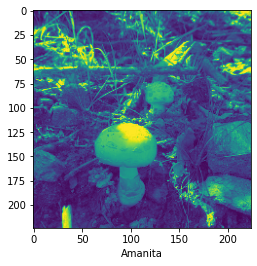

In [ ]:
train_image_no = 555
images_data, label_data = train_data[train_image_no]
plt.figure()
plt.imshow(images_data.reshape((224,224)).asnumpy())
plt.xlabel(class_names[label_data])
plt.show()


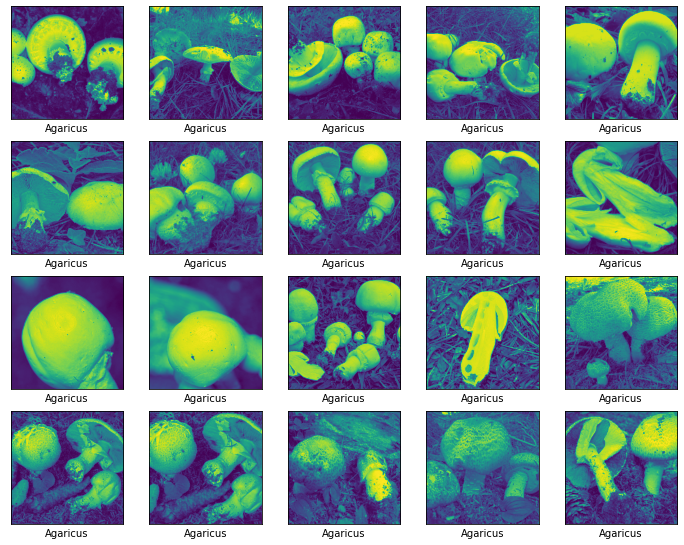

In [ ]:
plt.figure(figsize=(12,12))

for i in range(20):
    images_data, label_data = train_data[i]
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_data.reshape((224,224)).asnumpy()
)
    plt.xlabel(class_names[label_data])
plt.show()

In [ ]:
# try to load pretrained model:

ctx = mx.gpu(0) if mx.context.num_gpus() > 0 else mx.cpu(0)

In [ ]:
mx.context.num_gpus()

0

In [ ]:
densenet121 = vision.densenet121(pretrained=True, ctx=ctx)
mobileNet = vision.mobilenet0_5(pretrained=True, ctx=ctx)
resnet18 = vision.resnet18_v1(pretrained=True, ctx=ctx)

In [ ]:
print(mobileNet)

In [ ]:
mx.test_utils.download('https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/doc/tutorials/onnx/image_net_labels.json')
categories = np.array(json.load(open('image_net_labels.json', 'r')))
print(categories)

In [ ]:
#filename = mx.test_utils.download('https://github.com/dmlc/web-data/blob/master/mxnet/doc/tutorials/onnx/images/dog.jpg?raw=true', fname='dog.jpg')
filename = '/content/mushrooms-dataset/test/Russula/128_KUVMvp3TKp0.jpg'

In [ ]:
image = mx.image.imread(filename)
plt.imshow(image.asnumpy())

NameError: ignored

In [ ]:
image.shape

(600, 800, 3)

In [ ]:
def transform(image):
    cropped, crop_info = mx.image.center_crop(image, (550, 550))
    resized = mx.image.resize_short(cropped, 224) #minimum 224x224 images
    normalized = mx.image.color_normalize(resized.astype(np.float32)/255,
                                      mean=mx.nd.array([0.485, 0.456, 0.406]),
                                      std=mx.nd.array([0.229, 0.224, 0.225])) 
    # the network expect batches of the form (N,3,224,224)
    transposed = normalized.transpose((2,0,1))  # Transposing from (224, 224, 3) to (3, 224, 224)
    batchified = transposed.expand_dims(axis=0) # change the shape from (3, 224, 224) to (1, 3, 224, 224)
    return batchified

In [ ]:
def show(image):
  transformed = transform(image)
  reshaped = transformed.reshape(224,224)
  plt.figure()
  plt.imshow(reshaped.asnumpy())
  plt.show()

In [ ]:
def predict (model, image, categories, k):
  prediction = model(transform(image)).softmax()
  top = prediction.topk(k=k)[0].asnumpy()
  for index in top:
    probability = prediction[0][int(index)]
    category = categories[int(index)]
    print("{}: {:.2f}%".format(category, probability.asscalar()*100))

mushroom: 80.26%
agaric: 7.25%
lampshade, lamp shade: 2.38%


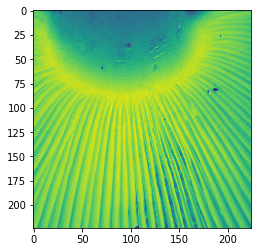

In [ ]:
predict(mobileNet, image, categories, 3)
show(image)

In [ ]:
predict(densenet121, image, categories, 5)

mushroom: 85.52%
agaric: 13.75%
hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa: 0.43%
earthstar: 0.11%
bolete: 0.02%


In [ ]:
predict(resnet18, image, categories, 3)

mushroom: 97.82%
agaric: 0.94%
hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa: 0.27%


In [ ]:
for param in resnet18.collect_params().values():
  param.req_grad = 'null'

#with mobileNet.name_scope():
#  mobileNet.add(Dense(9))

In [ ]:
resnet18.name_scope()

In [ ]:
with resnet18.name_scope():
  with resnet18.features.name_scope():
    resnet18.features.add(
        #nn.Dense(1000, activation='relu'),
        #nn.Dense(64, activation='relu'),
        nn.Dense(9, activation=None)
    )


In [ ]:
with resnet18.name_scope():
  resnet18.output = nn.Dense(9)

In [ ]:
print(resnet18)

ResNetV1(
  (features): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (2): Activation(relu)
    (3): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (4): HybridSequential(
      (0): BasicBlockV1(
        (body): HybridSequential(
          (0): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
          (2): Activation(relu)
          (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
        )
      )
      (1): BasicBlockV1(
        (body): HybridSeque

In [ ]:
batch_size = 34
train_loader = mx.gluon.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)

In [ ]:
resnet18.initialize(mx.init.Xavier(), ctx=ctx)

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'resnetv10_conv0_weight' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)
/usr/local/lib/python3.7/dist-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'resnetv10_batchnorm0_gamma' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)
/usr/local/lib/python3.7/dist-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'resnetv10_batchnorm0_beta' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_reinit=force_reinit)
/usr/local/lib/python3.7/dist-packages/mxnet/gluon/parameter.py:896: UserWarning: Parameter 'resnetv10_batchnorm0_running_mean' is already initialized, ignoring. Set force_reinit=True to re-initialize.
  v.initialize(None, ctx, init, force_rei

In [ ]:
tranferTrainer = gluon.Trainer(
    params=resnet18.collect_params(),
    optimizer='sgd',
    optimizer_params={'learning_rate': 0.04}
)

In [ ]:
metric = mx.metric.Accuracy()
loss_function = gluon.loss.SoftmaxCrossEntropyLoss()

In [ ]:
num_epochs = 10
history = []

def trainModel(model, trainer):
    
  for epoch in range(num_epochs):
      for inputs, labels in train_loader:
          # Possibly copy inputs and labels to the GPU
          inputs = inputs.as_in_context(ctx)
          labels = labels.as_in_context(ctx)

          # Forward pass
          with autograd.record():
              outputs = model(inputs)
              loss = loss_function(outputs, labels)

          # Backpropagation
          loss.backward()
          metric.update(labels, outputs)

          # Update
          trainer.step(batch_size=inputs.shape[0])

      # Print the evaluation metric and reset it for the next epoch
      name, acc = metric.get()
      history.insert(epoch,acc)
      print('.', end='')
      metric.reset()

  print('[Done]')

In [ ]:
trainModel(resnet18, tranferTrainer)

...

In [ ]:
predict(mobileNet, image, class_names, 5)

Lactarius: 72.18%
Cortinarius: 24.55%
Entoloma: 3.25%
Agaricus: 0.01%
Suillus: 0.00%


In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(history)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

NameError: ignored

<Figure size 504x288 with 0 Axes>

In [ ]:
prediction_image_number = 25
prediction_image, prediction_label = test_data[prediction_image_number]
predictions_single = mobileNet(transform(prediction_image))
predictions_single

MXNetError: ignored



---



In [ ]:

net = nn.HybridSequential(prefix='MLP_')
with net.name_scope():
    net.add(
        nn.Dense(1000, activation='relu'),
        nn.Dense(64, activation='relu'),
        nn.Dense(9, activation=None)
    )

In [ ]:
batch_size = 1
train_loader = mx.gluon.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)

In [ ]:
ctx = mx.gpu(0) if mx.context.num_gpus() > 0 else mx.cpu(0)
net.initialize(mx.init.Xavier(), ctx=ctx)

In [ ]:
trainer = gluon.Trainer(
    params=net.collect_params(),
    optimizer='sgd',
    optimizer_params={'learning_rate': 0.04},
)

In [ ]:

metric = mx.metric.Accuracy()
loss_function = gluon.loss.SoftmaxCrossEntropyLoss()

In [ ]:
num_epochs = 10
history = []
    
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Possibly copy inputs and labels to the GPU
        inputs = inputs.as_in_context(ctx)
        labels = labels.as_in_context(ctx)

        # Forward pass
        with autograd.record():            
            outputs = net(transform(inputs))
            loss = loss_function(outputs, labels)

        # Backpropagation
        loss.backward()
        metric.update(labels, outputs)

        # Update
        trainer.step(batch_size=inputs.shape[0])

    # Print the evaluation metric and reset it for the next epoch
    name, acc = metric.get()
    history.insert(epoch,acc)
    print('.', end='')
    metric.reset()

print('[Done]')

ValueError: ignored

In [ ]:
#file_name = "drive/MyDrive/Lab2_1/net.params"
#net.save_parameters(file_name)

Text(0.5, 0, 'Epoch')

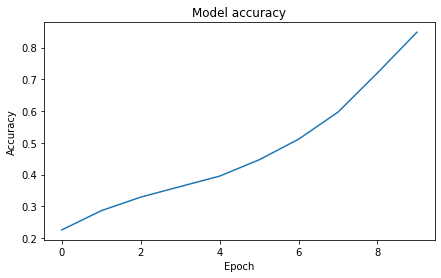

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(history)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
test_loader = mx.gluon.data.DataLoader(test_data, shuffle=False, batch_size=batch_size)
metric = mx.metric.Accuracy()
for inputs, labels in test_loader:
    # Possibly copy inputs and labels to the GPU
    inputs = inputs.as_in_context(ctx)
    labels = labels.as_in_context(ctx)
    metric.update(labels, net(inputs))
print('Validaton: {} = {}'.format(*metric.get()))

Validaton: accuracy = 0.35756676557863504


In [ ]:
# Function to display the image:
def plot_image(predictions_array, true_label, img):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img.reshape((48,48)).asnumpy(), cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  # Print a label with 'predicted class', 'probability %', 'actual class'
  plt.xlabel("{} [{:2.0f}] ({})".format(class_names[predicted_label],
                                np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Function to display the prediction results in a graph:
def plot_value_array(predictions_array, true_label):
  plt.xticks(range(10))
  plt.yticks([])
  plot = plt.bar(range(10), predictions_array, color="#777777")
  predicted_label = np.argmax(predictions_array)
  plot[predicted_label].set_color('red')
  plot[true_label].set_color('green')

In [ ]:
prediction_image_number = 25
prediction_image, prediction_label = test_data[prediction_image_number]
predictions_single = net(prediction_image)
predictions_single

MXNetError: ignored

In [ ]:
plot_value_array(predictions_single[0].asnumpy(), prediction_label)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

NameError: ignored

In [ ]:
  plot_image(predictions_single[0].asnumpy(), prediction_label, prediction_image)

In [ ]:
predictions = []
test_labels = []

for i in test_data:
    pred_image, pred_label = i
    p = net(pred_image)
    predictions.append(p)
    test_labels.append(pred_label)

MXNetError: ignored

In [ ]:
num_rows = 8
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(15, 16))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[i].asnumpy(), test_data[i][1], test_data[i][0])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(predictions[i][0].asnumpy(), test_data[i][1])
plt.show()